In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers

import IPython.display as ipd

## Перевод данных в 16-битный формат

In [5]:
import soundfile
import os

In [9]:
def transform_wav_to_16_bit(data_path:str):
    for audio_path in os.listdir(data_path):
        print(audio_path)
        data, samplerate = soundfile.read(data_path + audio_path)
        soundfile.write(fr'datas\alice16' + audio_path, data, samplerate, subtype='PCM_16')

In [10]:
transform_wav_to_16_bit(fr'C:\ML\DataBases\call_allice\alice')

2 мар., 10.07​(2).wav


LibsndfileError: Error opening 'C:\\ML\\DataBases\\call_allice\\alice2 мар., 10.07\u200b(2).wav': System error.

## Переход на mono

In [ ]:
from pydub import AudioSegment
import os

In [ ]:
def transform1(data_path):
    for audio_path in os.listdir(data_path):
        print(audio_path)
        sound = AudioSegment.from_wav(data_path + audio_path)
        sound = sound.set_channels(1)
        sound.export('datas16/nn_words/' + audio_path, format="wav")

In [ ]:
transform1('datas/nn_words16/')

2 мар., 10.26​(2).wav
2 мар., 10.26​(3).wav
2 мар., 10.26​(4).wav
2 мар., 10.26​(5).wav
2 мар., 10.26​.wav
2 мар., 10.27​(2).wav
2 мар., 10.27​(3).wav
2 мар., 10.27​.wav
2 мар., 10.30​(10).wav
2 мар., 10.30​(11).wav
2 мар., 10.30​(12).wav
2 мар., 10.30​(13).wav
2 мар., 10.30​(2).wav
2 мар., 10.30​(3).wav
2 мар., 10.30​(4).wav
2 мар., 10.30​(5).wav
2 мар., 10.30​(6).wav
2 мар., 10.30​(7).wav
2 мар., 10.30​(8).wav
2 мар., 10.30​(9).wav
2 мар., 10.30​.wav
2 мар., 10.31​(2).wav
2 мар., 10.31​(3).wav
2 мар., 10.31​(4).wav
2 мар., 10.31​(5).wav
2 мар., 10.31​(6).wav
2 мар., 10.31​(7).wav
2 мар., 10.31​(8).wav
2 мар., 10.31​.wav
2 мар., 10.32​(10).wav
2 мар., 10.32​(11).wav
2 мар., 10.32​(12).wav
2 мар., 10.32​(13).wav
2 мар., 10.32​(2).wav
2 мар., 10.32​(3).wav
2 мар., 10.32​(4).wav
2 мар., 10.32​(5).wav
2 мар., 10.32​(6).wav
2 мар., 10.32​(7).wav
2 мар., 10.32​(8).wav
2 мар., 10.32​(9).wav
2 мар., 10.32​.wav
2 мар., 10.33​(2).wav
2 мар., 10.33​(3).wav
2 мар., 10.33​(4).wav
2 мар., 10.33​(5)

## Основная программа

In [11]:
data_path = 'C:\ML\DataBases\call_allice'

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15080\436259998.py:1: SyntaxWarning: invalid escape sequence '\M'
  data_path = 'C:\ML\DataBases\call_allice'


In [12]:
def plot_model_metrics(history):
    metrics = list(history.history.items())[:len(history.history.items())//2+1]
    val_metrics = list(history.history.items())[len(history.history.items())//2:]

    plt.figure(figsize=(30, 5))

    for i, metric, val_metric in zip(range(len(history.history.keys())), metrics, val_metrics):
        plt.subplot(1, len(history.history.items()), i+1)
        plt.plot(range(1, len(metric[1])+1), metric[1], c='blue', label='training')
        plt.plot(range(1, len(val_metric[1])+1), val_metric[1], c='red', label='validation')
        plt.legend(loc='upper right')
        plt.title(metric[0].upper())
        plt.xlabel('epochs')
        plt.ylabel(metric[0])
        plt.tight_layout(h_pad=2, w_pad=2)
        plt.grid(True)

In [13]:
training_set, validation_set = keras.utils.audio_dataset_from_directory(
    directory=data_path,
    batch_size=16,
    validation_split=0.2,
    output_sequence_length=128_050,
    seed=0,
    subset='both'
)

Found 232 files belonging to 2 classes.
Using 186 files for training.
Using 46 files for validation.


In [14]:
label_names = training_set.class_names
label_names

['alice', 'nn_words']

## Предобработка датасета

In [15]:
def decode_audio(audio_binary):
    """переввод звука в массив данных"""
    audio, sampling_rate = tf.audio.decode_wav(contents=audio_binary)
    return audio, sampling_rate

In [16]:
def squeeze(audio, labels):
    '''перевод звука в формат mono'''
    audio = tf.squeeze(audio, axis=-1)
    return audio, labels

In [17]:
def get_spectrogram(waveform): 
    '''Преобразование данных в спектрограмму'''
    spectrogram = tf.signal.stft(waveform, frame_length=255, frame_step=128) 
    spectrogram = tf.abs(spectrogram)
    return spectrogram[..., tf.newaxis]

In [18]:
training_set = training_set.map(squeeze, tf.data.AUTOTUNE)
validation_set = validation_set.map(squeeze, tf.data.AUTOTUNE)

In [19]:
while True:
    folder = np.random.choice(os.listdir(data_path))
    if not os.path.isfile(folder):
        random_audio_path = fr'{data_path}\{folder}\{np.random.choice(os.listdir(data_path + "/" + folder))}'
        break
random_audio_path

'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.09\u200b(11).wav'

In [20]:
audio, label = next(iter(training_set))

In [21]:
ipd.Audio(random_audio_path)

In [22]:
def get_spectrogram_dataset(dataset):
    dataset = dataset.map(lambda x, y: (get_spectrogram(x), y),
                          num_parallel_calls=tf.data.AUTOTUNE)
    return dataset

In [23]:
train_set = get_spectrogram_dataset(training_set) 
validation_set = get_spectrogram_dataset(validation_set) 
  
val_set = validation_set.take(validation_set.cardinality() // 2) 
test_set = validation_set.skip(validation_set.cardinality() // 2)

In [24]:
train_set_shape = train_set.element_spec[0].shape 
val_set_shape = val_set.element_spec[0].shape 
test_set_shape = test_set.element_spec[0].shape 
  
print("Train set shape:", train_set_shape) 
print("Validation set shape:", val_set_shape) 
print("Testing set shape:", test_set_shape)

Train set shape: (None, 999, 129, 1)
Validation set shape: (None, 999, 129, 1)
Testing set shape: (None, 999, 129, 1)


In [25]:
input_shape = next(iter(train_set))[0][0].shape 
print("Input shape:", input_shape) 
num_labels = len(label_names)

Input shape: (999, 129, 1)


## Построение модели

In [26]:
model = tf.keras.Sequential([ 
        tf.keras.layers.Input(shape=input_shape), 

        tf.keras.layers.Resizing(64, 64), 
        tf.keras.layers.Normalization(), 
          
        tf.keras.layers.Conv2D(64, 3, activation='relu'),  
        tf.keras.layers.MaxPooling2D(), 
        tf.keras.layers.Dropout(0.5), 
        tf.keras.layers.Flatten(), 
          
        tf.keras.layers.Dense(num_labels, activation='softmax')
])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization (Normalization)   │ (None, 64, 64, 1)      │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 62, 62, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │       123,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,653 (483.02 KB)

 Trainable params: 123,650 (483.01 KB)

 Non-trainable params: 3 (16.00 B)

In [28]:
model.compile( 
    optimizer=tf.keras.optimizers.Adam(), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'] 
)

In [29]:
epochs = 5
verbose = True

monitor = 'loss'
min_delta = 0.01
patience = 3

callbacks = [keras.callbacks.EarlyStopping(monitor=monitor, min_delta=min_delta, patience=patience, verbose=verbose)]

In [30]:
history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6504 - loss: 0.6063 - val_accuracy: 0.6875 - val_loss: 0.7070
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8318 - loss: 0.3636 - val_accuracy: 0.7500 - val_loss: 0.7142
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9157 - loss: 0.2811 - val_accuracy: 0.7500 - val_loss: 0.6612
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9394 - loss: 0.2140 - val_accuracy: 0.7500 - val_loss: 0.7038
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9383 - loss: 0.1913 - val_accuracy: 0.7500 - val_loss: 0.6557


## Оценка обучения модели

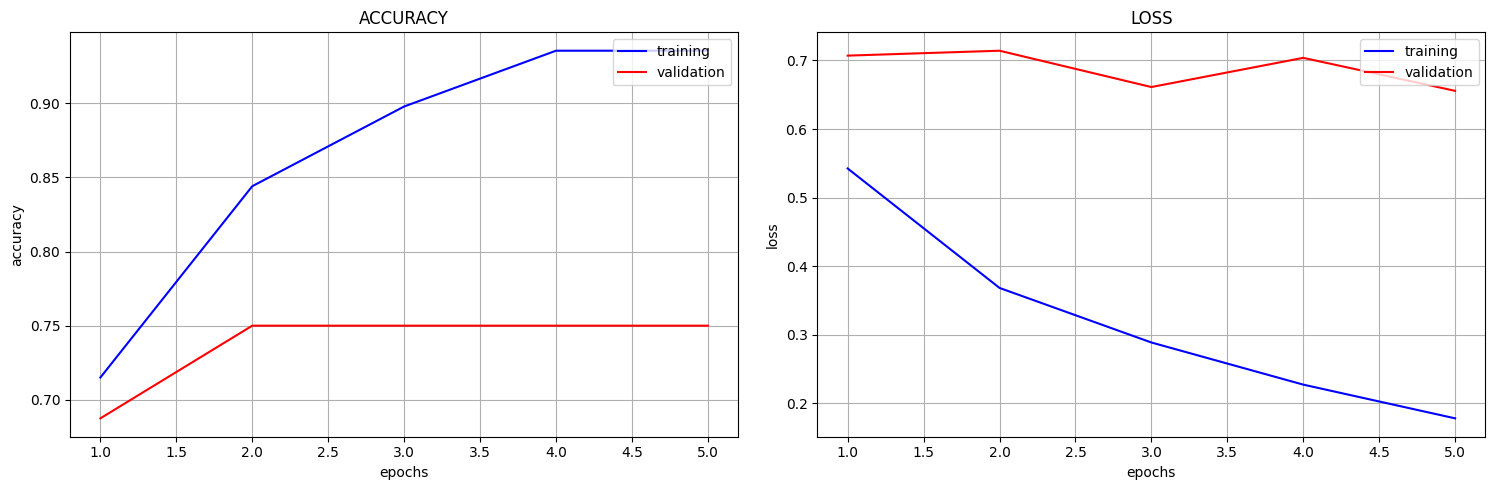

In [31]:
plot_model_metrics(history)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step 


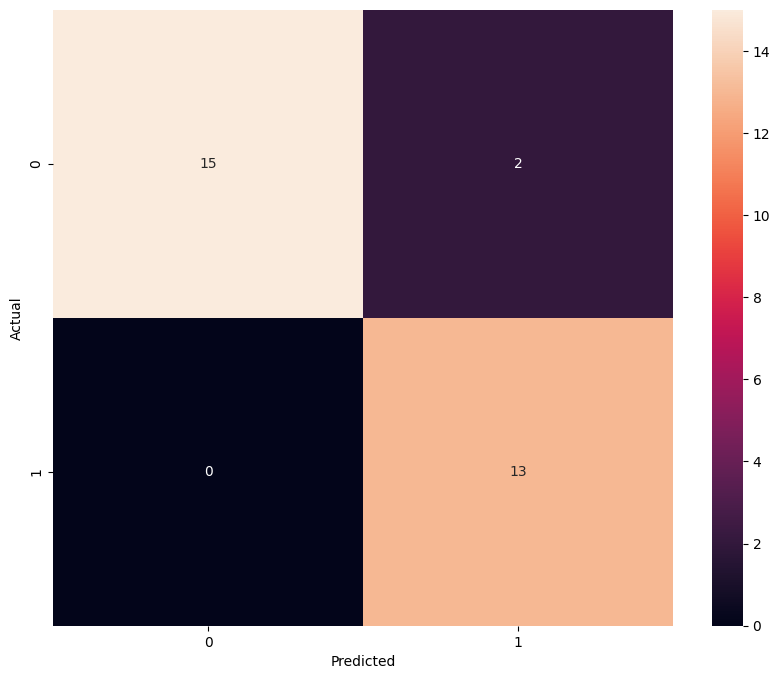

In [32]:
y_pred = np.argmax(model.predict(test_set), axis=1) 
y_true = np.concatenate([y for x, y in test_set], axis=0) 
cm = tf.math.confusion_matrix(y_true, y_pred) 
  
# Plotting the confusion matrix 
plt.figure(figsize=(10, 8)) 
sns.heatmap(cm, annot=True, fmt='g') 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show()

In [33]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.87      1.00      0.93        13

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30



## Тестирование

In [34]:
while True:
    folder = np.random.choice(os.listdir(data_path))
    if not os.path.isfile(folder):
        random_audio_path = fr'{data_path}\{folder}\{np.random.choice(os.listdir(data_path + "/" + folder))}'
        break
random_audio_path

'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.09\u200b(12).wav'

In [35]:
while True:
    folder = np.random.choice(os.listdir(data_path))
    if not os.path.isfile(folder):
        random_audio_path1 = fr'{data_path}\{folder}\{np.random.choice(os.listdir(data_path + "/" + folder))}'
        break
random_audio_path1

'C:\\ML\\DataBases\\call_allice\\nn_words\\2 мар., 10.33\u200b(8).wav'

первое голосовое

In [36]:
Input = tf.io.read_file(str(random_audio_path)) 
x, sample_rate = tf.audio.decode_wav(Input, desired_channels=1, desired_samples=128000,) 
audio, labels = squeeze(x, 'yes')

In [37]:
waveform = audio 
ipd.display(ipd.Audio(waveform, rate=44_000))

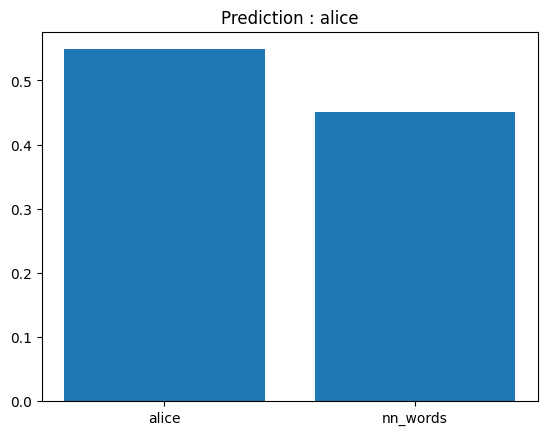

In [38]:
x = get_spectrogram(audio) 
x = tf.expand_dims(x, axis=0) 
  
prediction = model(x) 
plt.bar(label_names, tf.nn.softmax(prediction[0])) 
plt.title('Prediction : '+label_names[np.argmax(prediction, axis=1).item()]) 
plt.show()

второе голосовое

In [ ]:
Input = tf.io.read_file(str(random_audio_path1)) 
x, sample_rate = tf.audio.decode_wav(Input, desired_channels=1, desired_samples=128000,) 
audio, labels = squeeze(x, 'yes')

In [ ]:
waveform = audio 
ipd.display(ipd.Audio(waveform, rate=44_000))

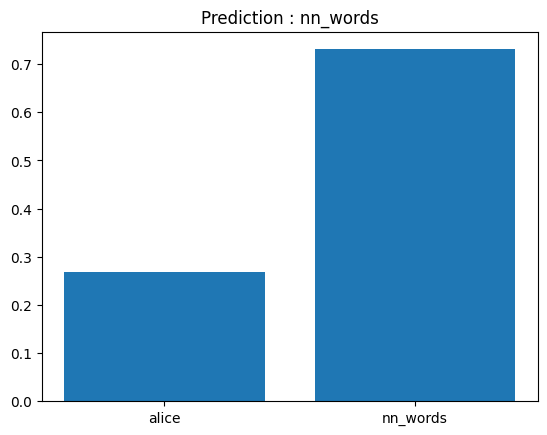

In [ ]:
x = get_spectrogram(audio) 
x = tf.expand_dims(x, axis=0) 
  
prediction = model(x) 
plt.bar(label_names, tf.nn.softmax(prediction[0])) 
plt.title('Prediction : '+label_names[np.argmax(prediction, axis=1).item()]) 
plt.show()